In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [22]:
# one way of conerting image to array of 

from PIL import Image
img = Image.open('one.jpg')
print (np.array(img))


[[[ 52 104 188]
  [ 56 108 194]
  [ 53 105 191]
  ...
  [ 40  87 177]
  [ 36  91 173]
  [ 37  89 172]]

 [[ 50 105 188]
  [ 53 105 191]
  [ 56 108 194]
  ...
  [ 41  89 174]
  [ 37  89 172]
  [ 38  91 171]]

 [[ 51 106 189]
  [ 51 103 189]
  [ 52 103 192]
  ...
  [ 40  88 173]
  [ 38  89 170]
  [ 38  89 170]]

 ...

 [[ 49  94 179]
  [ 50  94 181]
  [ 48  94 180]
  ...
  [ 35  81 169]
  [ 35  80 171]
  [ 35  80 171]]

 [[ 48  94 182]
  [ 47  93 181]
  [ 50  96 182]
  ...
  [ 35  81 167]
  [ 37  81 170]
  [ 36  80 169]]

 [[ 51  97 183]
  [ 48  94 180]
  [ 49  95 181]
  ...
  [ 37  81 168]
  [ 40  81 171]
  [ 39  80 170]]]


In [3]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tar = df.loc[:,'label']
tar = pd.DataFrame(data=tar)
tar.head()

,label
0,1
1,0
2,1
3,4
4,0


In [43]:
image = cv2.imread('one.jpg')
cv2.imshow('Original Image',image)
cv2.waitKey(0)


-1

In [38]:
gray_img = cv2.imread('one.jpg', cv2.IMREAD_GRAYSCALE)

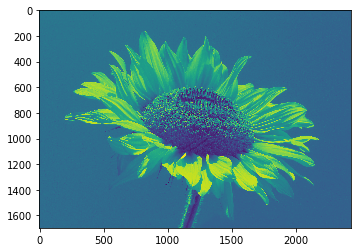

In [53]:
plt.imshow(gray_img)

In [51]:
image.shape

(12391494,)

In [45]:
gray_img.shape

(1697, 2434)

In [48]:
image[1,1]

array([191, 105,  53], dtype=uint8)

In [50]:
image = image.flatten()

In [1]:
# actual start with the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [66]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

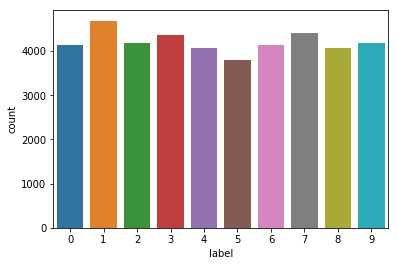

In [67]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [68]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [69]:
test = test/255

In [70]:
X_train = X_train/255

In [71]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [72]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [73]:
random_seed =2

In [74]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

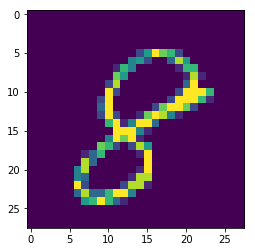

In [80]:
g = plt.imshow(X_train[0][:,:,0])

In [81]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [82]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [83]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [84]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [85]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [86]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [87]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 128s - loss: 0.4248 - acc: 0.8648 - val_loss: 0.0940 - val_acc: 0.9712
Epoch 2/30
 - 134s - loss: 0.1347 - acc: 0.9591 - val_loss: 0.0488 - val_acc: 0.9850
Epoch 3/30
 - 133s - loss: 0.1008 - acc: 0.9704 - val_loss: 0.0381 - val_acc: 0.9898
Epoch 4/30
 - 136s - loss: 0.0808 - acc: 0.9766 - val_loss: 0.0307 - val_acc: 0.9914
Epoch 5/30
 - 141s - loss: 0.0733 - acc: 0.9781 - val_loss: 0.0357 - val_acc: 0.9893
Epoch 6/30
 - 147s - loss: 0.0693 - acc: 0.9798 - val_loss: 0.0349 - val_acc: 0.9905
Epoch 7/30
 - 137s - loss: 0.0623 - acc: 0.9823 - val_loss: 0.0343 - val_acc: 0.9893

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 139s - loss: 0.0471 - acc: 0.9860 - val_loss: 0.0229 - val_acc: 0.9929
Epoch 9/30
 - 135s - loss: 0.0452 - acc: 0.9866 - val_loss: 0.0239 - val_acc: 0.9940
Epoch 10/30
 - 136s - loss: 0.0476 - acc: 0.9863 - val_loss: 0.0186 - val_acc: 0.9952
Epoch 11/30
 - 147s 

In [88]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [89]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [90]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [91]:
X_train[0][:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

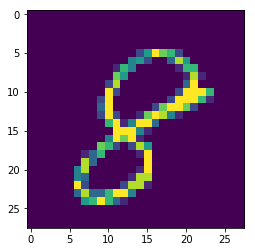

In [92]:
plt.imshow(X_train[0][:,:,0])

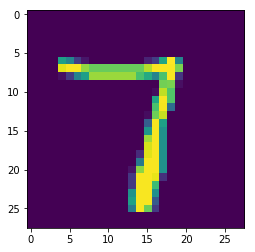

In [94]:
plt.imshow(X_train[1][:,:,0])